<a href="https://colab.research.google.com/github/Gowreesh10/Weather_Forecasting/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [4]:
dataset = pd.read_csv("/content/Chennai_1990_2022_Madras.csv")
display(dataset)

,time,tavg,tmin,tmax,prcp
0,01-01-1990,25.2,22.8,28.4,0.5
1,02-01-1990,24.9,21.7,29.1,0.0
2,03-01-1990,25.6,21.4,29.8,0.0
3,04-01-1990,25.7,NaN,28.7,0.0
4,05-01-1990,25.5,20.7,28.4,0.0
...,...,...,...,...,...
11889,21-07-2022,28.4,24.5,32.8,21.1
11890,22-07-2022,27.8,24.6,32.2,22.1
11891,23-07-2022,27.4,24.7,32.6,18.6
11892,24-07-2022,27.8,25.0,33.3,9.1


In [ ]:
dataset.describe()

,tavg,tmin,tmax,prcp
count,11867.000000,8810.000000,10875.000000,7008.000000
mean,28.490798,24.382770,33.908285,6.244378
std,2.605824,2.592423,3.380630,19.039751
min,20.900000,12.000000,23.800000,0.000000
25%,26.300000,22.600000,31.100000,0.000000
50%,28.700000,24.600000,34.000000,0.000000
75%,30.400000,26.400000,36.200000,3.000000
max,36.600000,31.000000,44.600000,344.900000


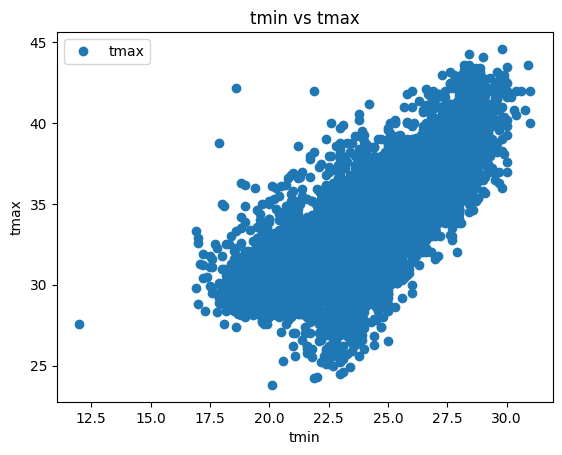

In [ ]:
dataset.plot(x='tmin', y='tmax', style='o')
plt.title('tmin vs tmax')
plt.xlabel('tmin')
plt.ylabel('tmax')
plt.show()

<Figure size 1500x1000 with 0 Axes>

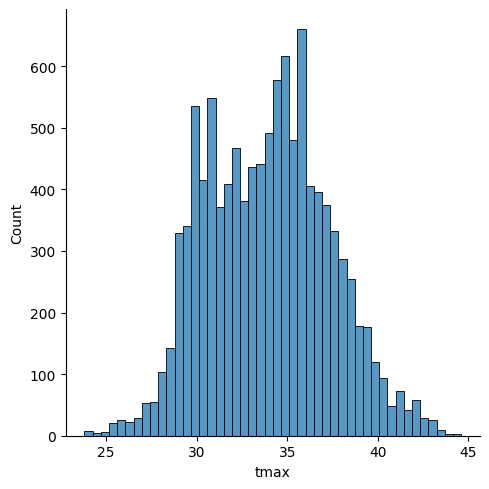

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.displot(dataset['tmax'])

In [5]:
dataset.apply(pd.isnull).sum()/dataset.shape[0]

time    0.000000
tavg    0.002270
tmin    0.259290
tmax    0.085673
prcp    0.410795
dtype: float64

In [6]:
dataset=dataset.fillna(method="ffill")

In [7]:
dataset.apply(pd.isnull).sum()/dataset.shape[0]

time    0.0
tavg    0.0
tmin    0.0
tmax    0.0
prcp    0.0
dtype: float64

In [8]:
X = dataset['tmin'].values.reshape(-1,1)
y = dataset['tmax'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[9.35970541]
[[1.00231807]]


In [9]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,29.5,30.508617
1,31.6,33.916498
2,29.3,32.212557
3,40.0,38.326698
4,38.0,35.520207
...,...,...
2374,31.6,33.916498
2375,33.8,35.820902
2376,31.5,32.914180
2377,30.0,28.002821


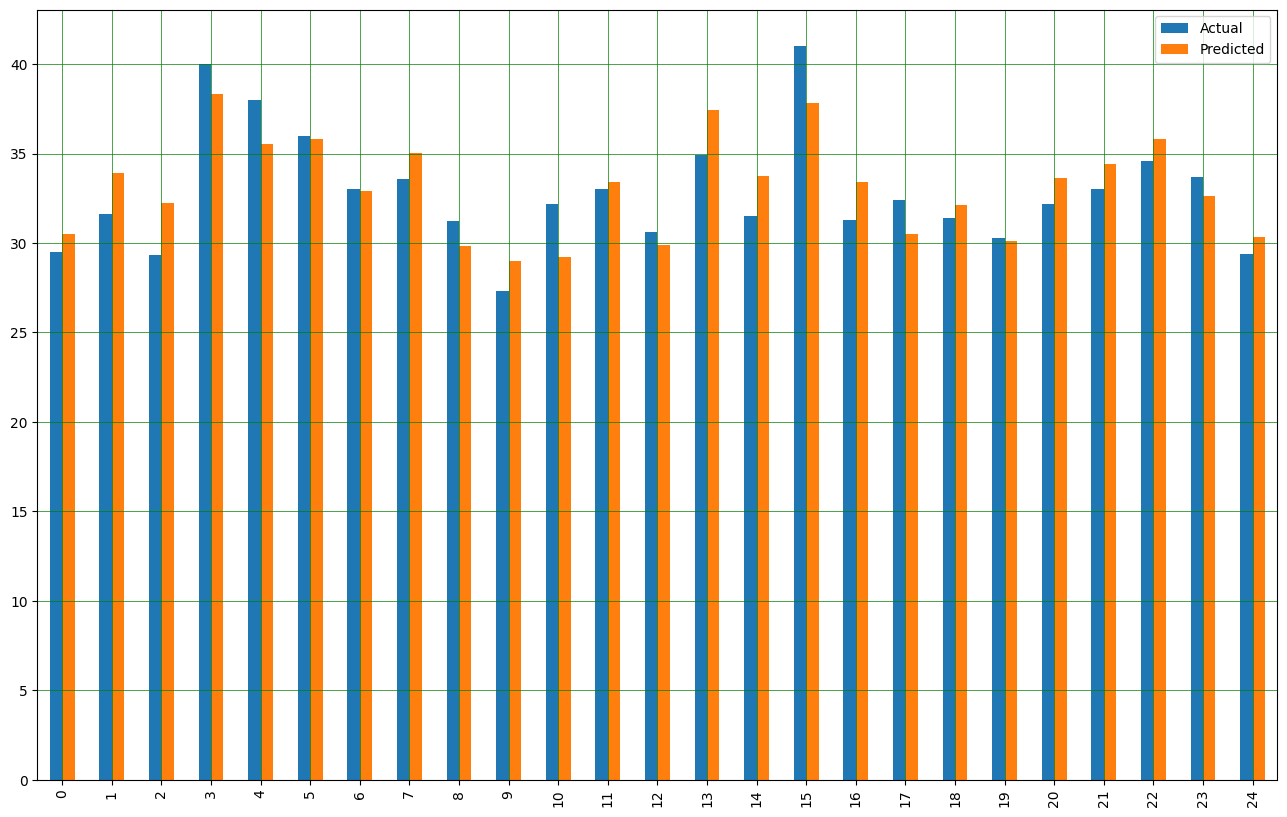

In [10]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

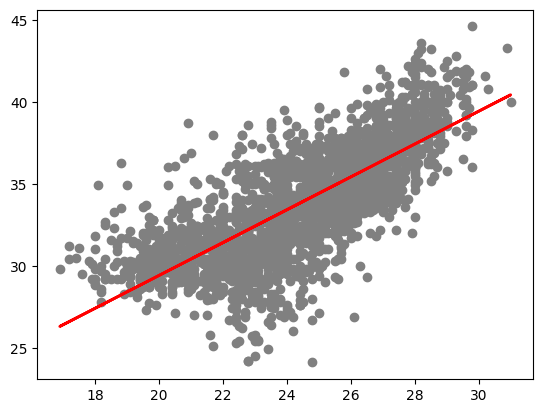

In [ ]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print(r2_score*100,'%')

55.8682763753132 %
